### Essential Libraries

Let us begin by importing the essential Python Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

---

### Import the Dataset

In [2]:
rawdata = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
data = pd.read_pickle("data_postprep.pkl")
data.head()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels,isMale,fastingbloodsugar,exerciseangia,chestpain_Asymptomatic,...,chestpain_NonAnginal,chestpain_TypicalAngina,restingrelectro_LeftVentricularHypertrophy,restingrelectro_Normal,restingrelectro_WaveAbnormality,slope_Downsloping,slope_Flat,slope_Undefined,slope_Upsloping,hasHeartDisease
0,53,171,0,147,5.3,3,True,False,False,False,...,True,False,False,False,True,True,False,False,False,True
1,40,94,229,115,3.7,1,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,49,133,142,202,5.0,0,True,False,True,False,...,True,False,False,True,False,False,False,False,True,False
3,43,138,295,153,3.2,2,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
4,31,199,0,136,5.3,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True


---

# Exploration of dataset

In [3]:
print("Data dimensions : ", data.shape)

Data dimensions :  (1000, 21)


We can see the dataset contains 1000 patients and 21 variables after refining the raw dataset.

In [4]:
data.dtypes

age                                             int64
restingBP                                       int64
serumcholestrol                                 int64
maxheartrate                                    int64
oldpeak                                       float64
noofmajorvessels                                int64
isMale                                           bool
fastingbloodsugar                                bool
exerciseangia                                    bool
chestpain_Asymptomatic                           bool
chestpain_AtypicalAngina                         bool
chestpain_NonAnginal                             bool
chestpain_TypicalAngina                          bool
restingrelectro_LeftVentricularHypertrophy       bool
restingrelectro_Normal                           bool
restingrelectro_WaveAbnormality                  bool
slope_Downsloping                                bool
slope_Flat                                       bool
slope_Undefined             

In the raw dataset, some variables (gender, chestpain, fastingbloodsugar, restingrelectro, exerciseangia, slope and classification) seemed like they were numeric but they are actually categorical. The levels of categorical variables are encoded by numbers. After the data preparation stage, the categorical variables have been decomposed into their respective categories and now have the boolean data type.

In [5]:
data.describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700,1.222000
std,17.86473,29.965228,132.443801,34.190268,1.720753,0.977585
min,20.00000,94.000000,0.000000,71.000000,0.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000,0.000000
50%,49.00000,147.000000,318.000000,146.000000,2.400000,1.000000
75%,64.25000,181.000000,404.250000,175.000000,4.100000,2.000000
max,80.00000,200.000000,602.000000,202.000000,6.200000,3.000000


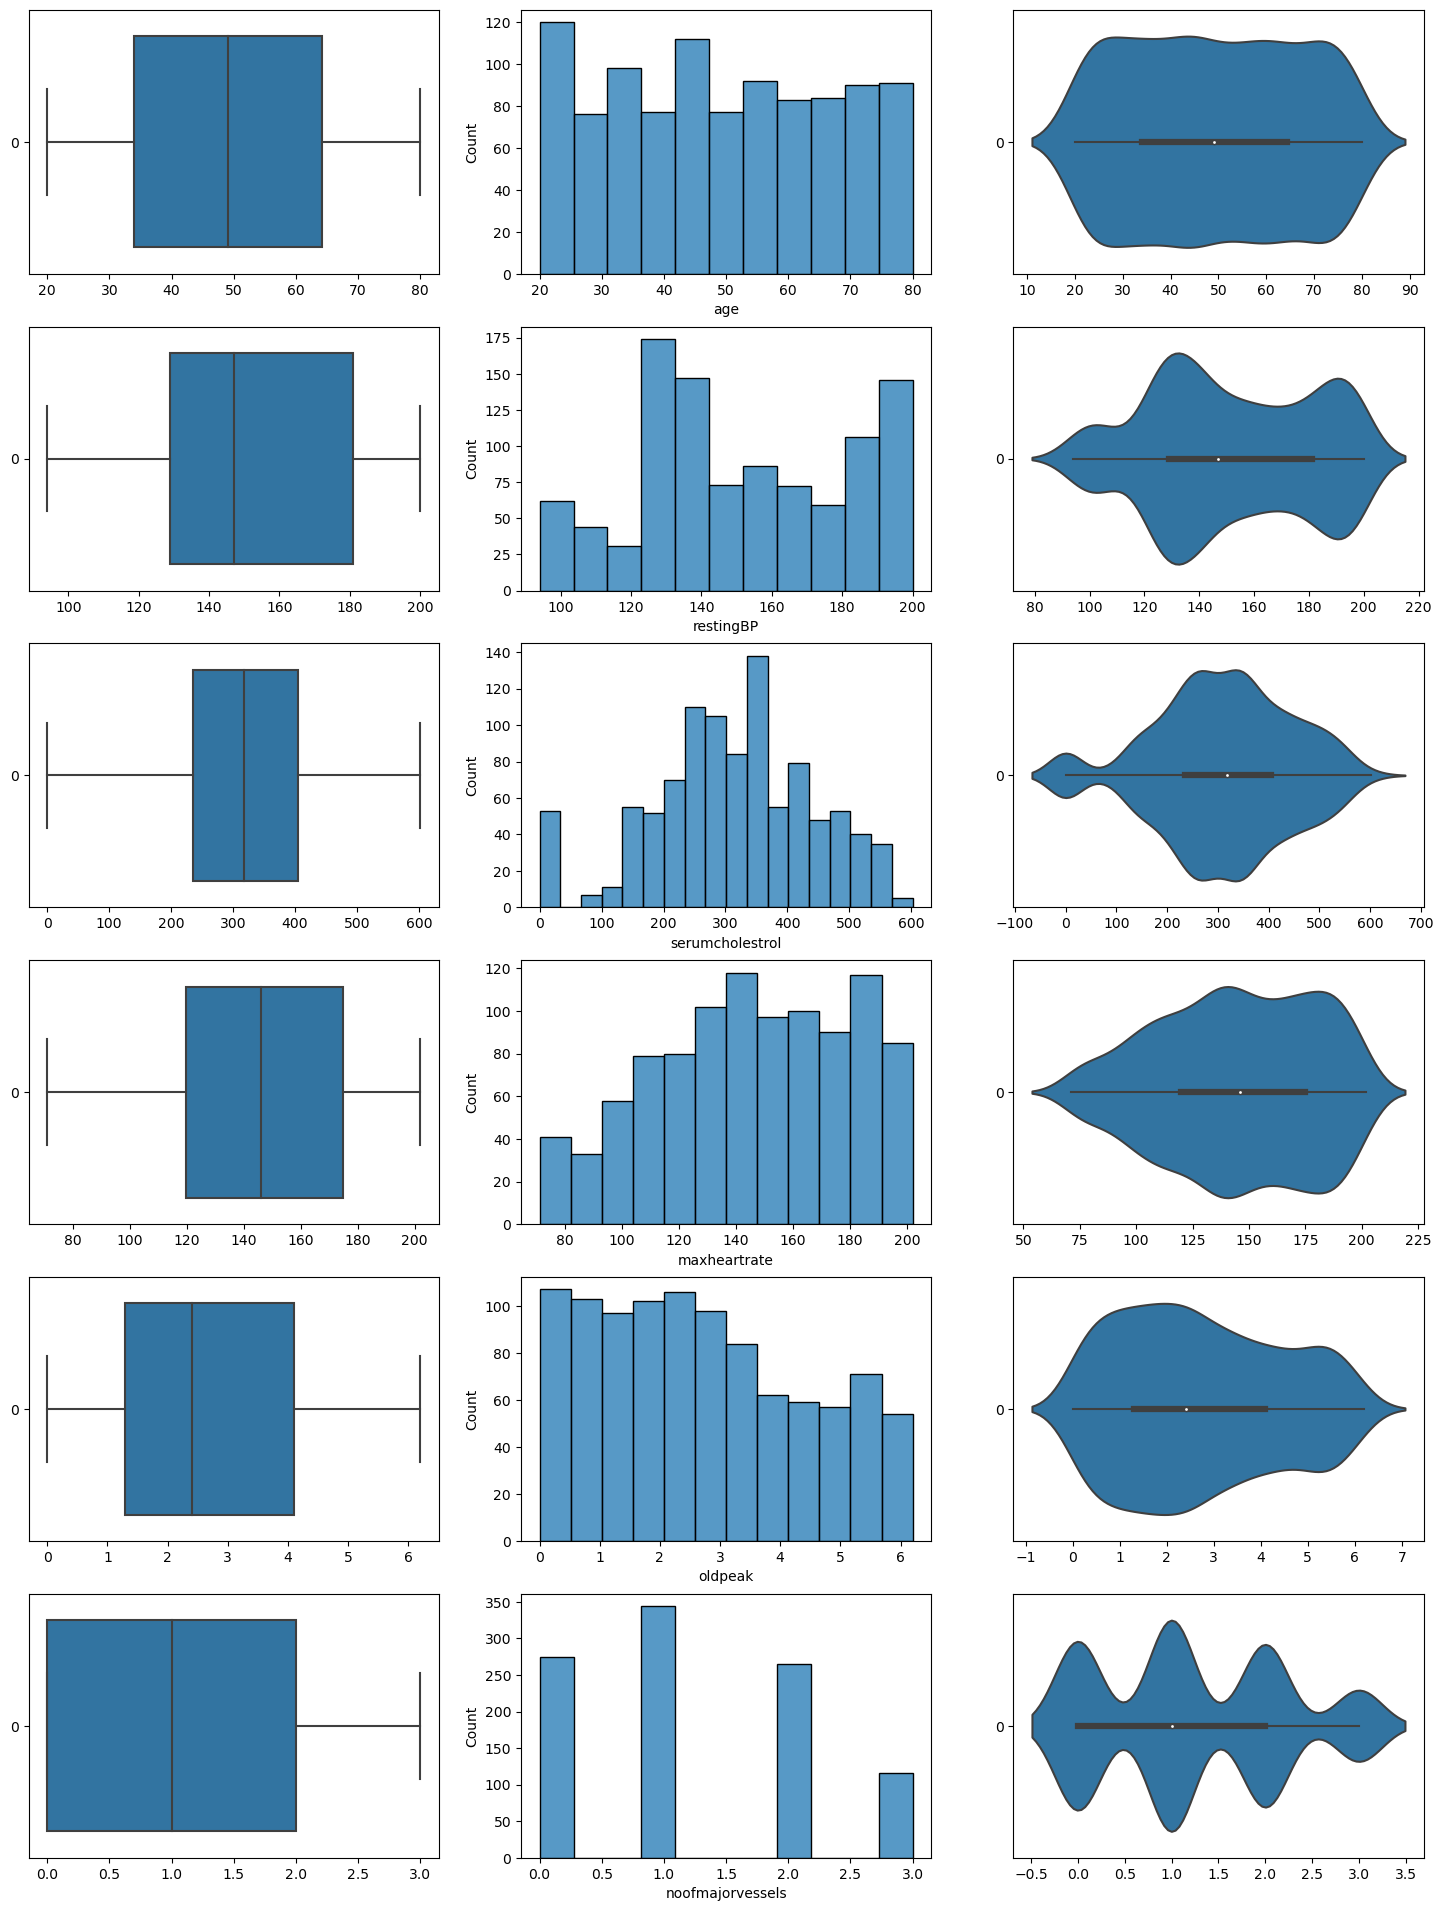

In [6]:
numeric_data = pd.DataFrame(data[["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak", "noofmajorvessels"]])

numeric_data.describe().round(2)

f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

The table above provides the basic statistical summary and visualisation of the numeric variables.

### Is there any strong correlation between the numeric variables?

                       age  restingBP  serumcholestrol  maxheartrate  \
age               1.000000  -0.016126         0.035439     -0.040092   
restingBP        -0.016126   1.000000         0.126523      0.095569   
serumcholestrol   0.035439   0.126523         1.000000      0.038967   
maxheartrate     -0.040092   0.095569         0.038967      1.000000   
oldpeak          -0.026020  -0.004225        -0.025910      0.044614   
noofmajorvessels  0.025407   0.263194         0.132419      0.122763   

                   oldpeak  noofmajorvessels  
age              -0.026020          0.025407  
restingBP        -0.004225          0.263194  
serumcholestrol  -0.025910          0.132419  
maxheartrate      0.044614          0.122763  
oldpeak           1.000000          0.086992  
noofmajorvessels  0.086992          1.000000  


<Axes: >

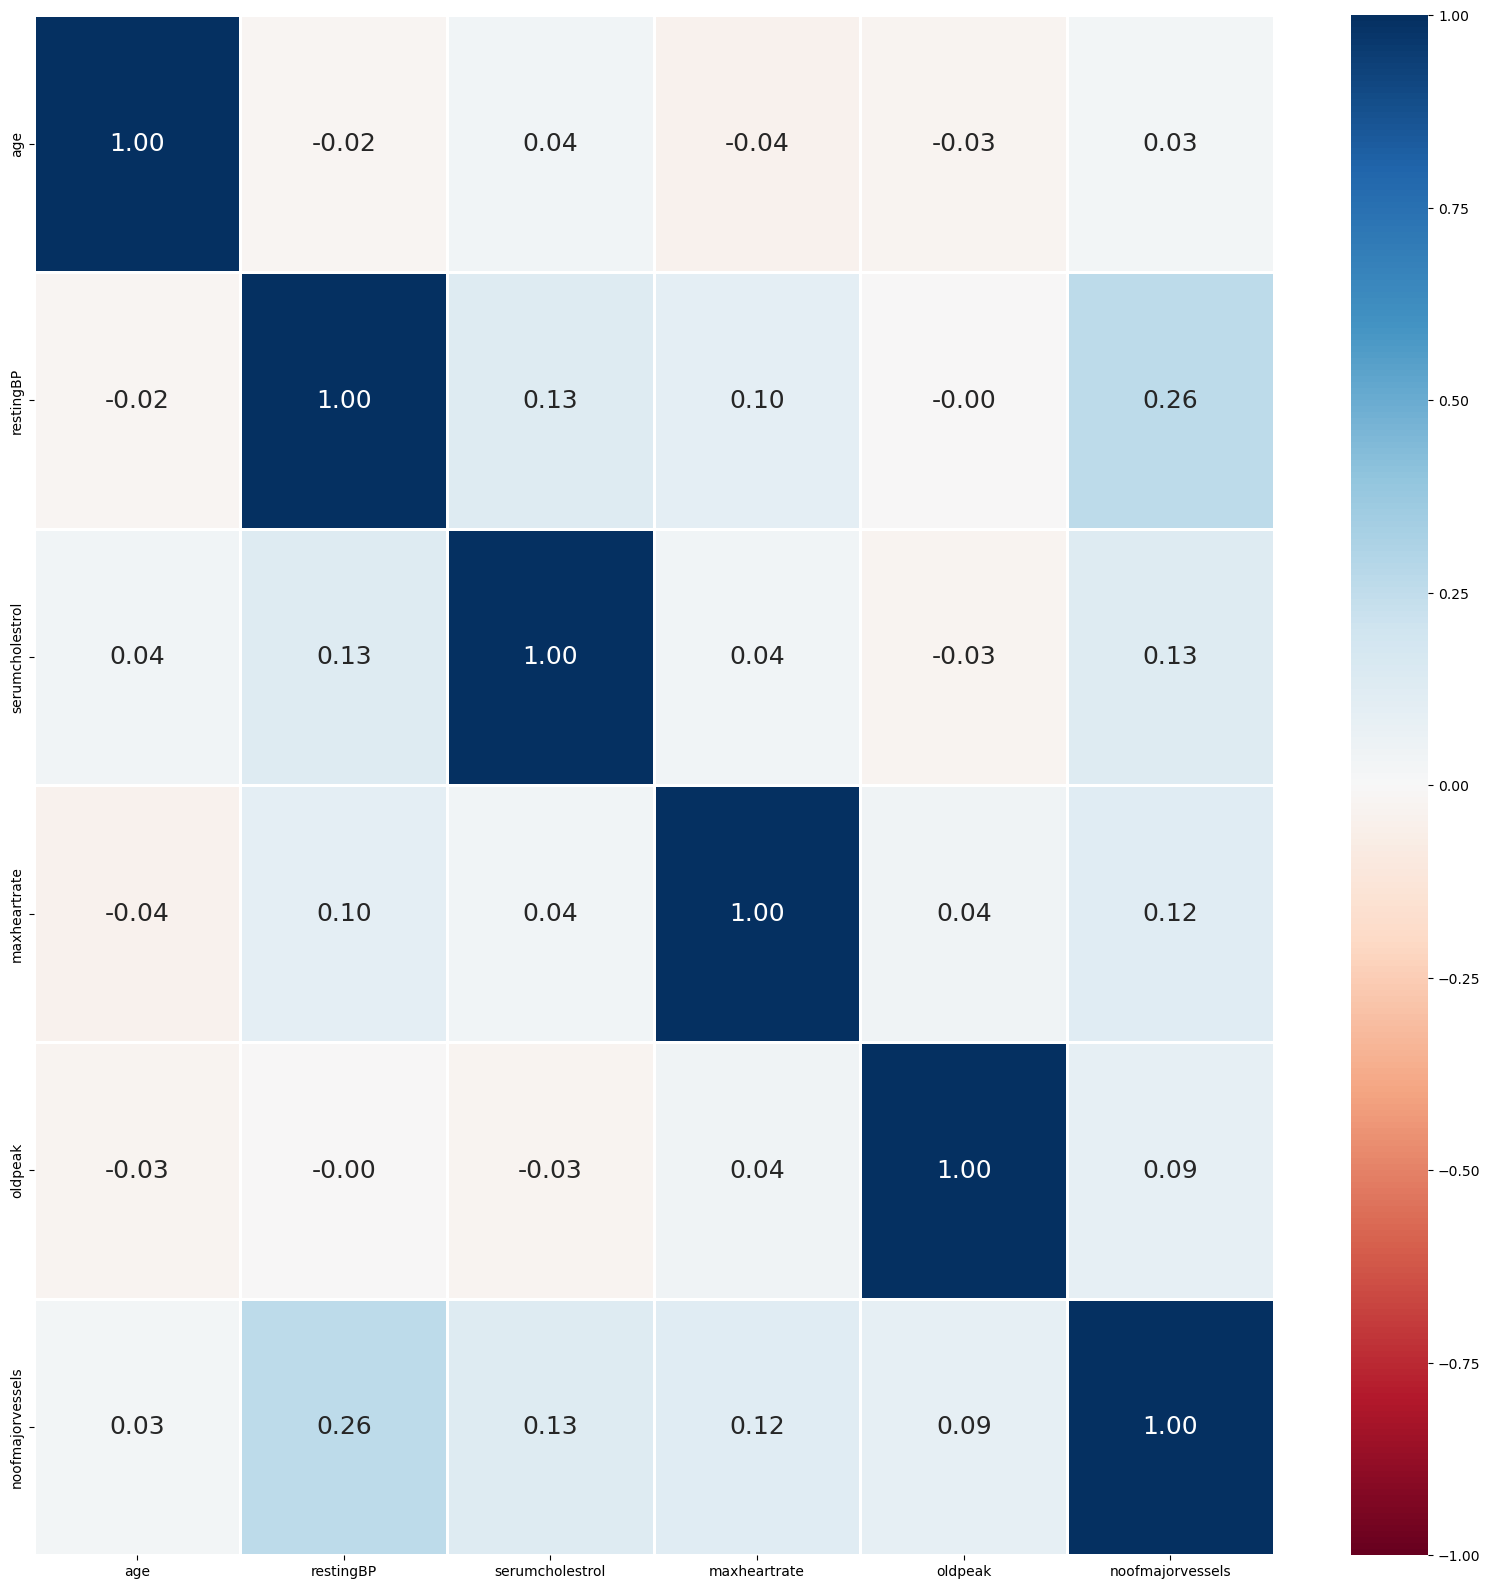

In [10]:
print(numeric_data.corr())
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

We can see that there is no strong correlation between any of the numeric variables. The 2 variables with the strongest correlation are the number of major vessels and resting blood pressure.

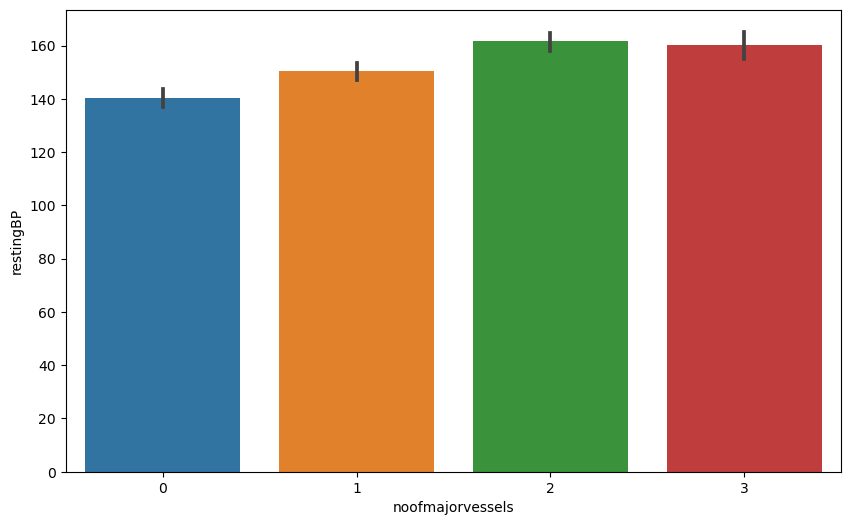

In [12]:
plt.figure(figsize=(10, 6))
sb.barplot(x='noofmajorvessels', y= 'restingBP', data=data)
plt.show()

---
### How many patients have heart disease?

Number of patients with heart disease: 580
Percentage of patients with heart disease: 58.0 %


/Users/agneswai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


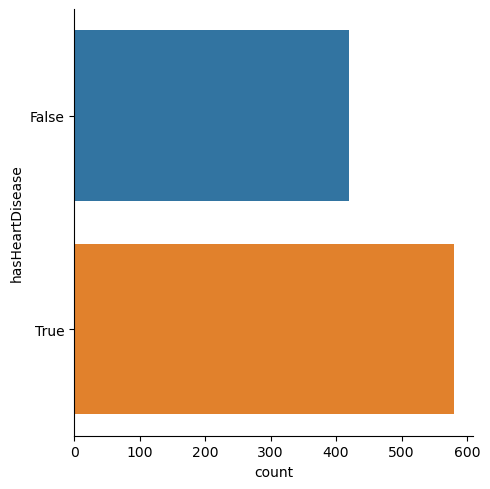

In [15]:
count_hasHeartDiseaseTrue, count_hasHeartDiseaseFalse = data['hasHeartDisease'].value_counts()
print("Number of patients with heart disease:", count_hasHeartDiseaseTrue)
print("Percentage of patients with heart disease:", (count_hasHeartDiseaseTrue) / 10,"%")
sb.catplot(y = "hasHeartDisease", data = data, kind = "count")


580 patients have heart disease (orange bar), this is a little more than half of the total patients.

### Is there any distinct relationship between the presence of heart disease and the numeric variables?

#### Age and heart disease:

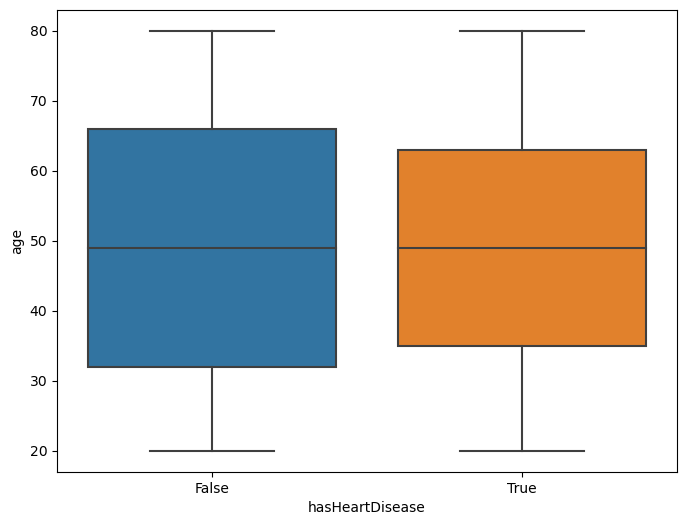

In [29]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='hasHeartDisease', y='age', data=data)
plt.show()

We can see that age generally has no effect on whether or not the patient has heart disease. In other words, one can get heart disease regardless of age.

#### Resting blood pressure and heart disease:

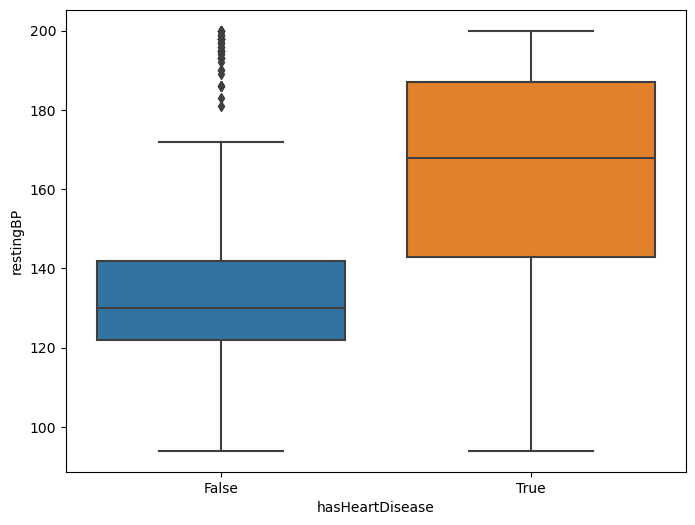

<Axes: xlabel='restingBP', ylabel='hasHeartDisease'>

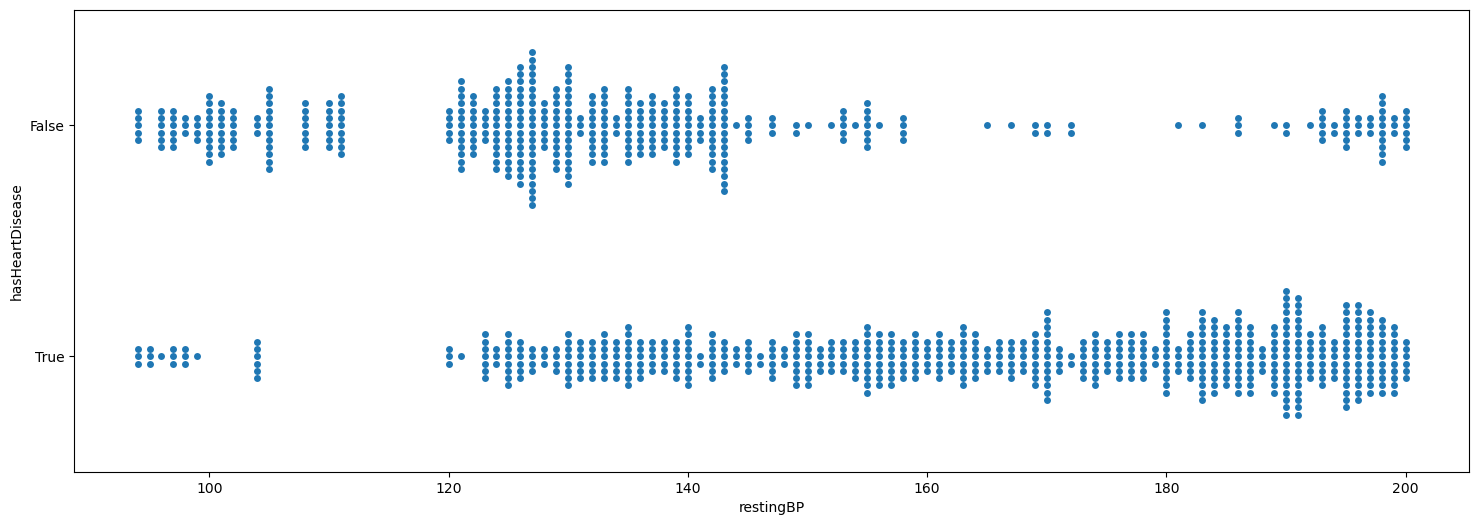

In [31]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='hasHeartDisease', y='restingBP', data=data)
plt.show()

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "restingBP", y = "hasHeartDisease", data = data, orient = "h")

We can infer from the diagrams above that patients with heart disease tend to have a higher resting blood pressure.

#### Serum cholesterol and heart disease:

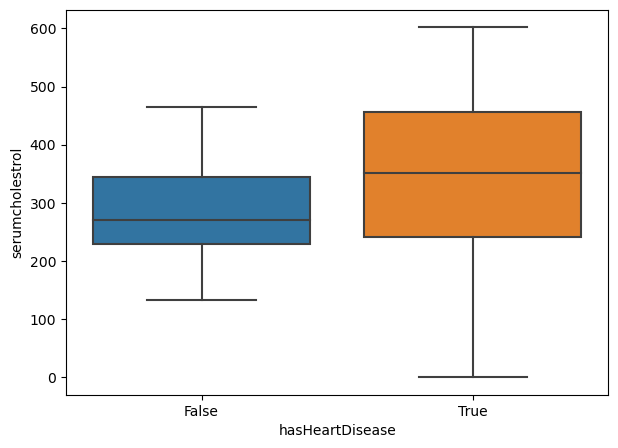

In [32]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='serumcholestrol', data=data)
plt.show()

Patients who have heart disease appear to have a larger range of serum cholesterol than those who do not have heart disease.

#### Maximum heart rate and heart disease:

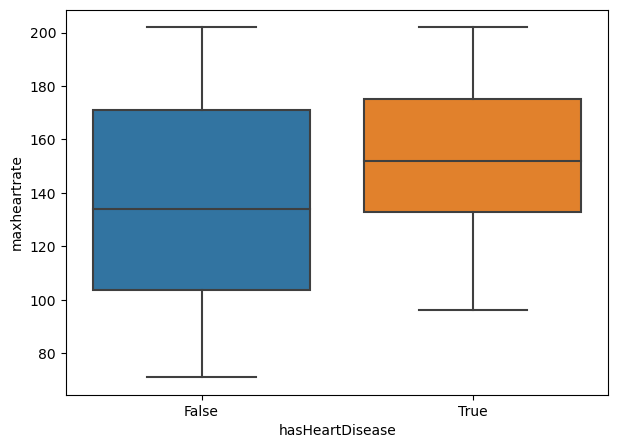

In [33]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='maxheartrate', data=data)
plt.show()

Patients who have heart disease have a higher median maximum heart rate than those who do not. The range of maximum heart rate for patients with heart disease is also shorter.

#### Oldpeak and heart disease:

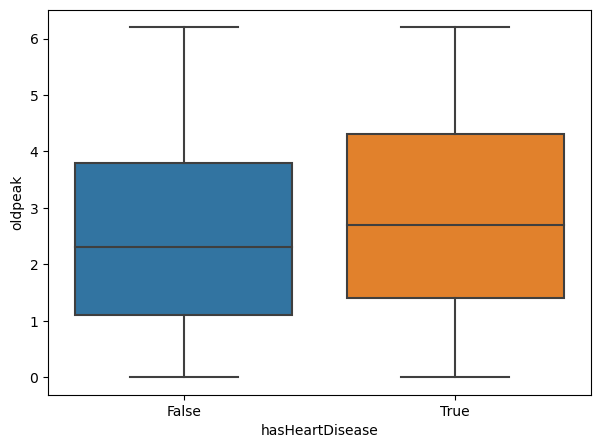

In [34]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='oldpeak', data=data)
plt.show()

There is no significant difference in oldpeak for patients with and without heart disease.

#### Number of major blood vessels and heart disease:

noofmajorvessels
1    344
0    275
2    265
3    116
Name: count, dtype: int64


/Users/agneswai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


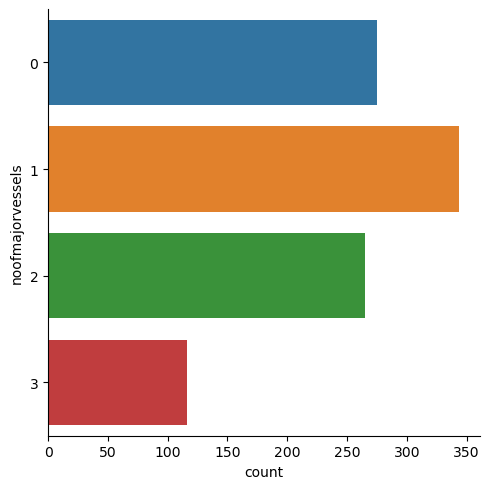

In [36]:
print(data['noofmajorvessels'].value_counts())
sb.catplot(y = "noofmajorvessels", data = data, kind = "count")

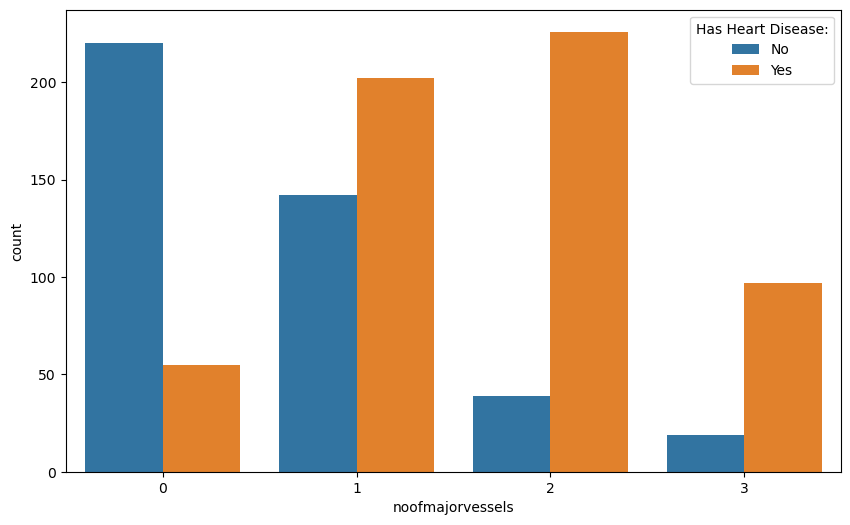

In [37]:
plt.figure(figsize=(10, 6))
sb.countplot(x='noofmajorvessels', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])
plt.legend(title='Has Heart Disease:', labels=['No', 'Yes'])
plt.show()

Most patients that have heart disease have 2 major blood vessels.

---
### Is there any strong correlation between the presence of heart disease and the other boolean variables?

#### Gender and heart disease:

Number of male patients: 765
Number of female patients: 235


/Users/agneswai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


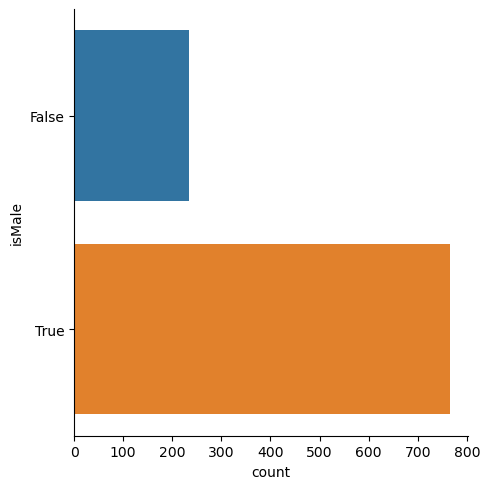

In [38]:
count_male, count_female = data['isMale'].value_counts()
print("Number of male patients:", count_male)
print("Number of female patients:", count_female)
sb.catplot(y = "isMale", data = data, kind = "count")

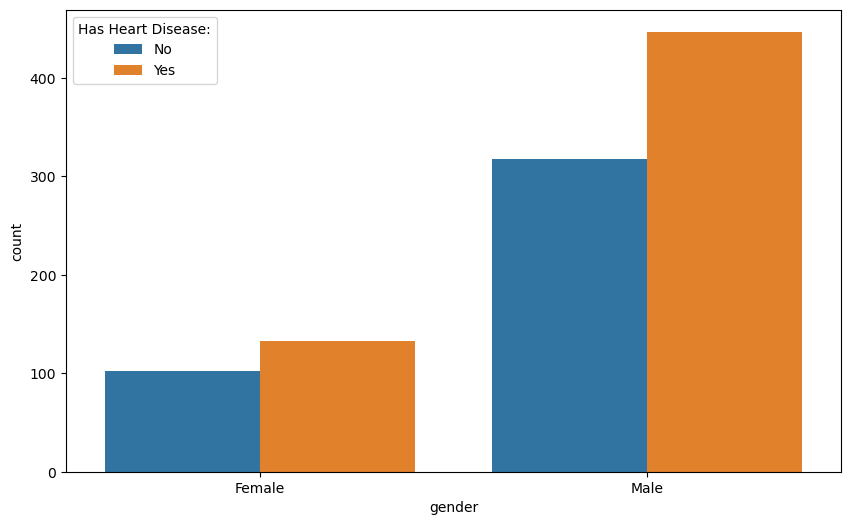

In [39]:
plt.figure(figsize=(10, 6))
sb.countplot(x='gender', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Has Heart Disease:', labels=['No', 'Yes'])
plt.show()

There are signficantly more males than females in this dataset but it does not necessarily mean males are more prone to heart disease.

#### Chest pain and heart disease:

#### What is the most common type of chest pain amongst our patients?

Number of patients with typical angina: 420
Number of patients with atypical angina: 224
Number of patients with non-anginal pain: 312
Number of patients with asymptomatic pain: 44


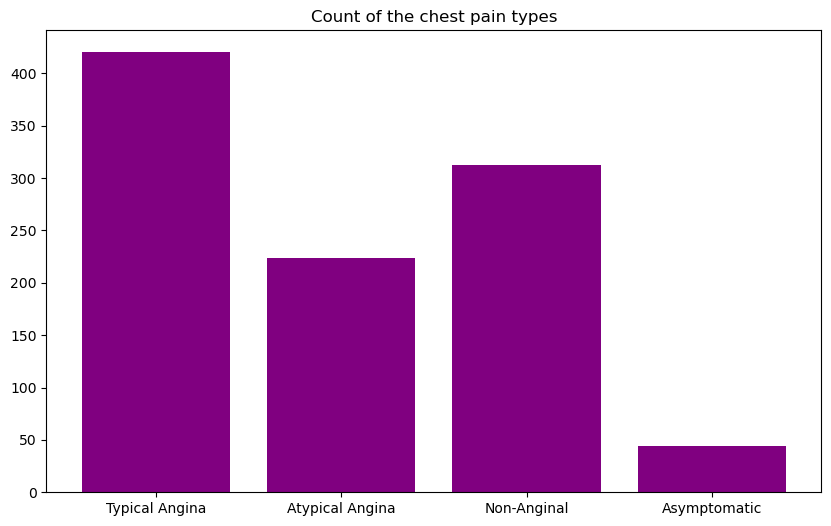

In [40]:
count_TypicalAnginaFalse, count_TypicalAnginaTrue = data['chestpain_TypicalAngina'].value_counts()
print("Number of patients with typical angina:", count_TypicalAnginaTrue)

count_AtypicalAnginaFalse, count_AtypicalAnginaTrue = data['chestpain_AtypicalAngina'].value_counts()
print("Number of patients with atypical angina:", count_AtypicalAnginaTrue)

count_NonAnginalFalse, count_NonAnginalTrue = data['chestpain_NonAnginal'].value_counts()
print("Number of patients with non-anginal pain:", count_NonAnginalTrue)

count_AsymptomaticFalse, count_AsymptomaticTrue = data['chestpain_Asymptomatic'].value_counts()
print("Number of patients with asymptomatic pain:", count_AsymptomaticTrue)

chest_pain_types = ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic']
counts = [count_TypicalAnginaTrue, count_AtypicalAnginaTrue, count_NonAnginalTrue, count_AsymptomaticTrue]

plt.figure(figsize=(10, 6))
plt.bar(chest_pain_types, counts, color='purple')
plt.title('Count of the chest pain types')
plt.show()

The most common chest pain type is typical angina with a count of 420.

#### Is there a significant relationship between the presence of heart disease across the different types of chest pains?

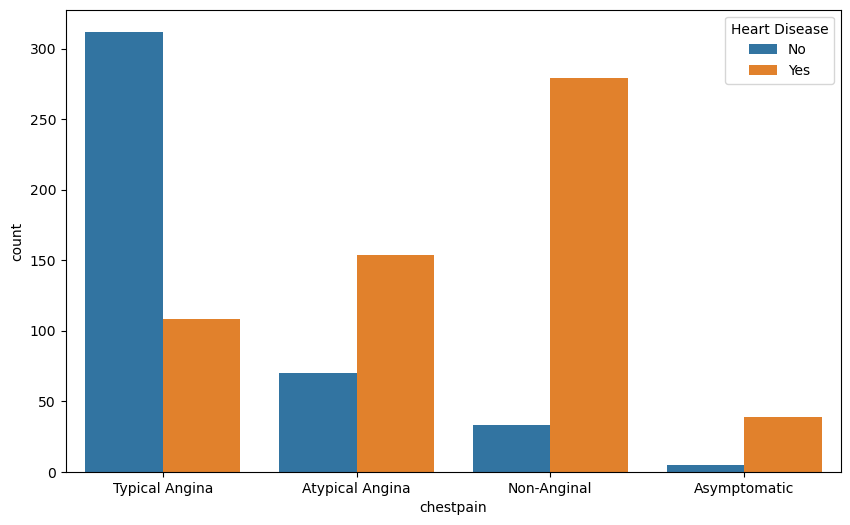

In [25]:
plt.figure(figsize=(10, 6))
sb.countplot(x='chestpain', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Looking at the patients who suffer from heart disease, most of them had non-anginal chest pains.

#### Is there a relationship between the presence of heart disease and fasting blood sugar?

#### Count of patients with fasting blood sugar that exceeds 120 mg/dl.

Number of patients with fasting blood sugar exceeding 120mg/dl: 296
percentage: 29.6 %


/Users/agneswai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


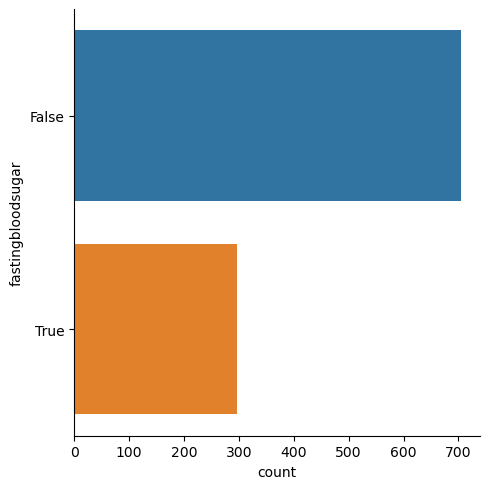

In [41]:
count_fastingbloodsugarFalse, count_fastingbloodsugarTrue = data['fastingbloodsugar'].value_counts()
print("Number of patients with fasting blood sugar exceeding 120mg/dl:", count_fastingbloodsugarTrue)
print("percentage:", count_fastingbloodsugarTrue / 10,"%")
sb.catplot(y = "fastingbloodsugar", data = data, kind = "count")

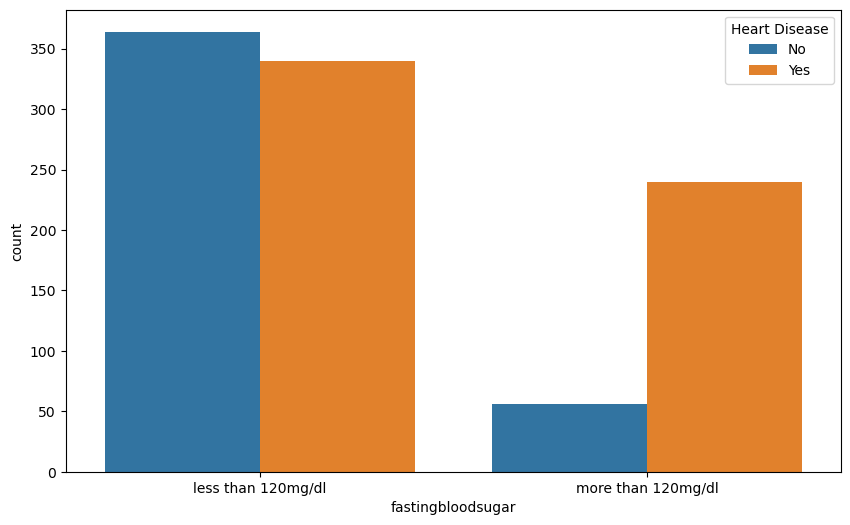

In [43]:
plt.figure(figsize=(10, 6))
sb.countplot(x='fastingbloodsugar', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['less than 120mg/dl', 'more than 120mg/dl'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Most patients who have heart disease have fasting blood sugar that is less than 120mg/dl.

#### ECG results and heart disease:

Number of patients with normal resting ECG results: 454
Number of patients with wave abnormality: 344
Number of patients with high risk of left ventricular hypertrophy: 202


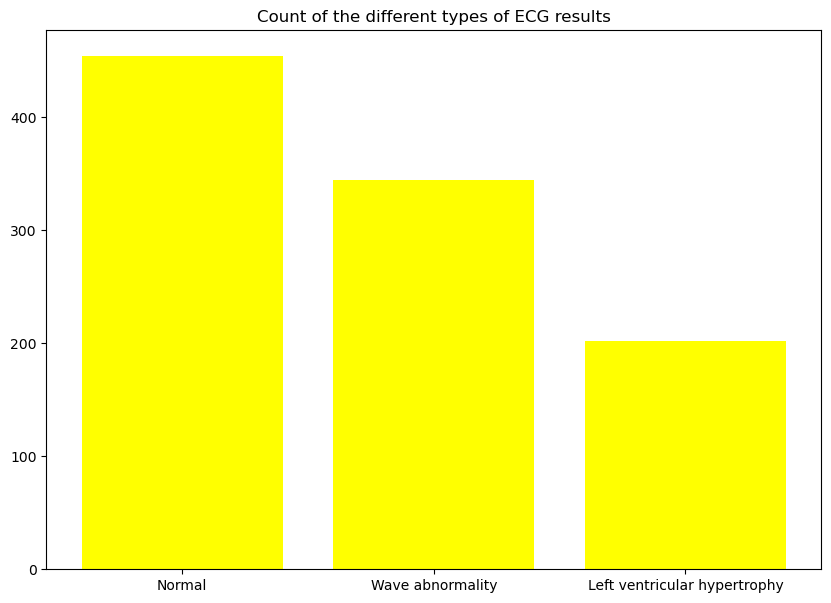

In [44]:
count_electronormalFalse, count_electronormalTrue = data['restingrelectro_Normal'].value_counts()
print("Number of patients with normal resting ECG results:", count_electronormalTrue)

count_electroabnormalFalse, count_electroabnormalTrue = data['restingrelectro_WaveAbnormality'].value_counts()
print("Number of patients with wave abnormality:", count_electroabnormalTrue)

count_electrohypertrophyFalse, count_electrohypertrophyTrue = data['restingrelectro_LeftVentricularHypertrophy'].value_counts()
print("Number of patients with high risk of left ventricular hypertrophy:", count_electrohypertrophyTrue)

ecg_types = ['Normal', 'Wave abnormality', 'Left ventricular hypertrophy']
counts = [count_electronormalTrue, count_electroabnormalTrue, count_electrohypertrophyTrue]
plt.figure(figsize=(10, 7))
plt.bar(ecg_types, counts, color='yellow')
plt.title('Count of the different types of ECG results')
plt.show()

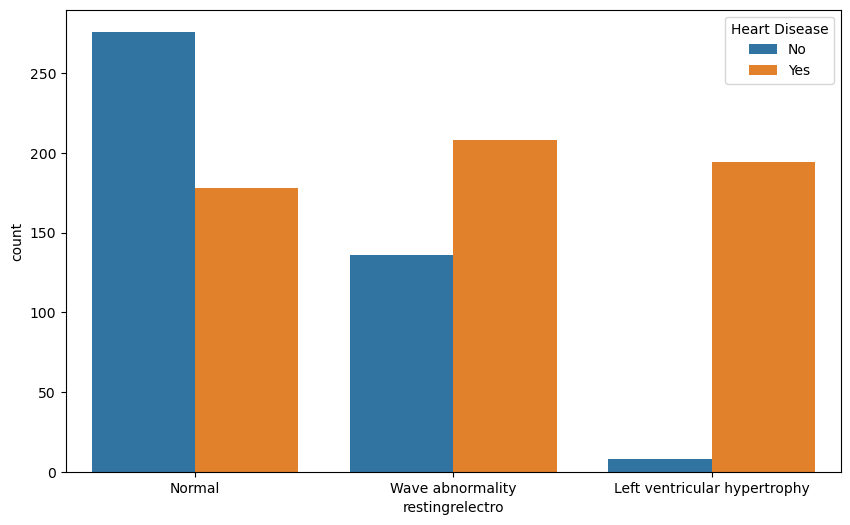

In [47]:
plt.figure(figsize=(10, 6))
sb.countplot(x='restingrelectro', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Wave abnormality', 'Left ventricular hypertrophy'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The number of patients with heart disease is quite evenly spread out across the different types of resting ECG results.

### Exercise induced angina and heart disease:

#### Number of patients with exercise induced angina:

Number of patients with exercise induced angina: 498
Percentage: 49.8 %


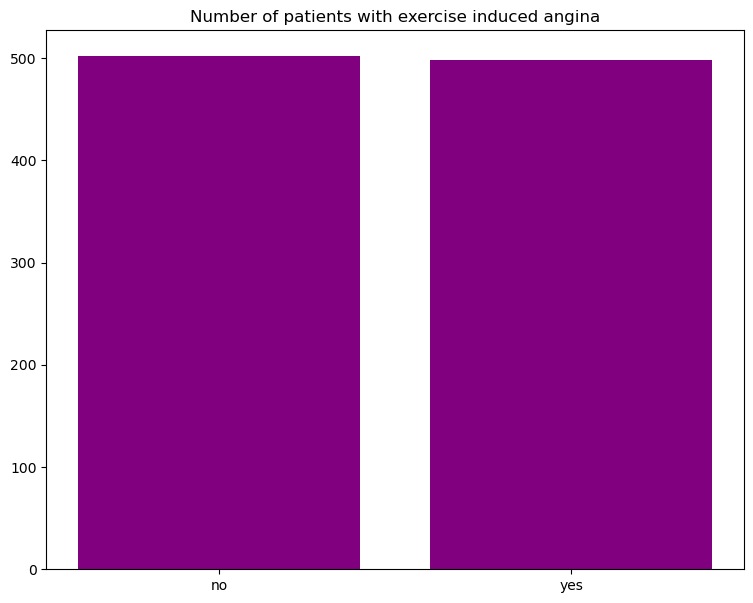

In [51]:
count_EIAFalse, count_EIATrue = data['exerciseangia'].value_counts()
print("Number of patients with exercise induced angina:", count_EIATrue)
print("Percentage:", count_EIATrue / 10,"%")

eia_types = ['no', 'yes']
counts = [count_EIAFalse, count_EIATrue]
plt.figure(figsize=(9, 7))
plt.bar(eia_types, counts, color='purple')
plt.title('Number of patients with exercise induced angina')
plt.show()

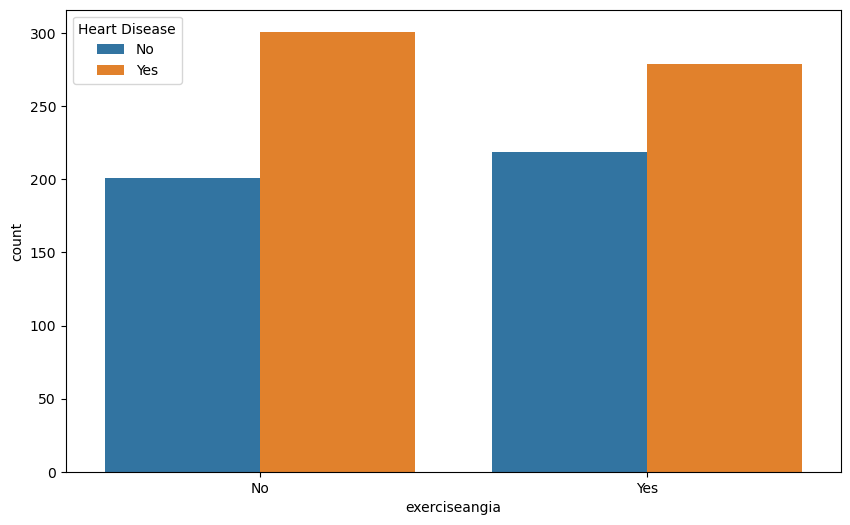

In [52]:
plt.figure(figsize=(10, 6))
sb.countplot(x='exerciseangia', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

There is no significant relationship between whether or not the patients experience exercise induced angina and having heart disease.

#### Slope of ST segment and heart disease:

#### Number of patients with the different types of slope:

Number of patients with uplsoping ST segment: 299
Number of patients with flat ST segment: 322
Number of patients with downsloping ST segment: 199


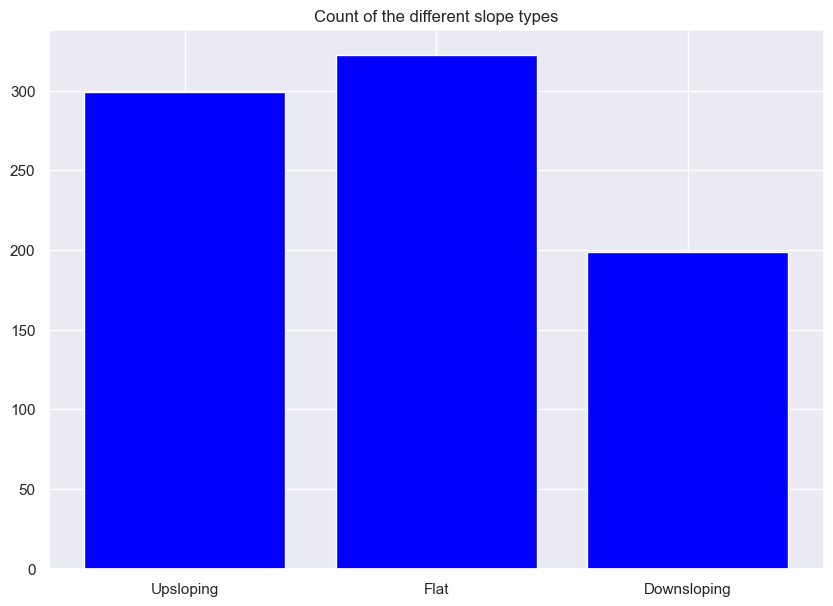

In [170]:
count_upslopeFalse, count_upslopeTrue = data['slope_Upsloping'].value_counts()
print("Number of patients with uplsoping ST segment:", count_upslopeTrue)

count_flatFalse, count_flatTrue = data['slope_Flat'].value_counts()
print("Number of patients with flat ST segment:", count_flatTrue)

count_downFalse, count_downTrue = data['slope_Downsloping'].value_counts()
print("Number of patients with downsloping ST segment:", count_downTrue)

slope_types = ['Upsloping', 'Flat', 'Downsloping']
counts = [count_upslopeTrue, count_flatTrue, count_downTrue]
plt.figure(figsize=(10, 7))
plt.bar(slope_types, counts, color='blue')
plt.title('Count of the different slope types')
plt.show()

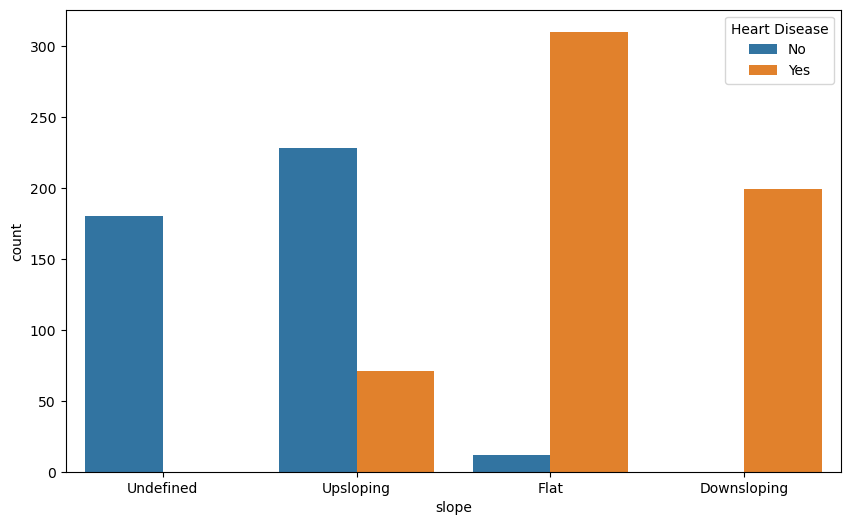

In [54]:
plt.figure(figsize=(10, 6))
sb.countplot(x='slope', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Undefined', 'Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

There is a significant discrepency in the number of patients who have a flat slope for their ST segments. Patients with a flat slope are at a high likelihood of having heart disease. Patients who have a dowsloping ST segment are almost definitely suffering from heart disease.